#  COE49412: Lab 3 - Introduction to Feedfoward Neural Networks

 Objectives:
- Trying to understand the impact of varying the hyperparameters, loss functions, activation functions and number of epochs on the accuracy and performance of the neural network
- Implementing forward pass
- Manipulating weights to minimize loss
- Applying different activation and loss functions 


Useful Resources:
   - Feedforward Neural Network lecture and notebook
   - Regression loss functions: https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
   - Activation functions: https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html
   



Submit on iLearn the notebook with your solution by Wednesday 26th 11:59pm.


Please type in your name and student ID:

- Name: Danayal Khan
- ID: b00069350

In [2]:
# Please make sure all the libraries are installed

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import statistics

In [10]:

# Exercises: Find the optimal weights by changing the following:
    # 1. hyperparameters (eta and delta)
    # 2. loss functions
    # 3. activation functions 
    # 4. number of epochs.
    
# for each exercise, you should observe and compare the results of applying different values or functions
   # (minimum, maximum, mean and standard deviation of the loss)
# and view the comparison in a table format


min loss= 0.00496251434970052
max loss= 2.849166036296218
mean loss= 0.9734611985295137
std loss= 0.8443251558029272
w1
[[0.84413829 0.70090216 0.51892655 0.89557533]
 [1.2278571  0.472923   0.43994332 0.60436511]]
w2
[[ 0.94269246]
 [ 0.42245826]
 [ 0.08421562]
 [-0.40207194]]
predicted value: 5.0049625143497005


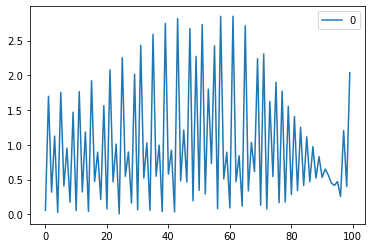

In [11]:
# weight = weight - eta * d(loss)/d(weight)
# Use the following code for the lab exercises, you will only need to modify some of its functions and paramters

# Initial weights 
w1 = np.random.random((2,4))
w2 = np.random.random((1,4))
w2 = w2.T  #to get the right shape for multiply

# Intialize the data we are training on 
x = np.array([[2,3]])
y = 5


def relu(X):
   return np.maximum(0,X)

def forward(x,y, weight1, weight2):
    out1 = relu(np.dot(x,weight1))
    out2 = relu(np.dot(out1, weight2))
    return loss(out2[0][0],y)


def loss(x,y):
    return abs(x-y)



def predict(x,weight1, weight2):
    out1 = relu(np.dot(x,weight1))
    out2 = relu(np.dot(out1, weight2))
    return out2[0][0]

# arbitrary change in weight
d_weight = 0.1

def calc_d(w,i,j, x, y, w1,w2,loss):
  w[i,j] = w[i,j]+d_weight
  new_loss = forward(x,y,w1,w2)
  d_loss = new_loss-loss
  return d_loss/d_weight

def update_weights(w1, w2,x, y,loss):   
    w1_updated = np.random.random((2,4))
    for i in range(2):
      for j in range(4):
        w1_updated[i,j] = w1[i,j] - 0.01*calc_d(w1,i,j,x,y,w1,w2,loss)

    w2_updated = np.random.random((1,4))
    w2_updated = w2_updated.T

    for i in range(4):
        w2_updated[i,0] = w2[i,0] - 0.01*calc_d(w2, i,0,x,y,w1,w2,loss)
     
    return w1_updated, w2_updated


def train_nn(w1,w2,epochs):
 minimum = 10000
 los = np.random.random(epochs)
 for z in range(100): 
   curr_loss = forward(x,y,w1, w2)
   los[z] = curr_loss
 
  # save the matrices with the minimum loss
   if (curr_loss<minimum):
    minimum = curr_loss
    w1_min = np.copy(w1)
    w2_min = np.copy(w2)
    
   w1,w2 = update_weights(w1, w2,x, y, curr_loss)
 
 return los, w1_min, w2_min

# wu1 and wu2 have the matrices that gave minimum loss
los, wu1, wu2 = train_nn(w1,w2,100)


## Plot the error
df = pd.DataFrame(los)
print("min loss=",los.min())
print("max loss=",los.max())
print("mean loss=",los.mean())
print("std loss=", los.std())

sns.lineplot(data=df)

print("w1")
print(wu1)
print("w2")
print(wu2)
print("predicted value:",predict(np.array([[2,3]]),wu1, wu2))



In [12]:



for i in np.arange(0.001, 0.5, 0.09):
    print(i)


0.001
0.091
0.181
0.271
0.361
0.45099999999999996


    Delta    Eta      Loss
4   0.001  0.361  0.000090
2   0.001  0.181  0.001590
1   0.001  0.091  0.001713
3   0.001  0.271  0.003705
5   0.001  0.451  0.018791
8   0.091  0.181  0.195922
12  0.181  0.001  0.265992
6   0.091  0.001  0.635211
18  0.271  0.001  0.993377
24  0.361  0.001  1.020790
7   0.091  0.091  1.614318
9   0.091  0.271  2.337402
0   0.001  0.001  3.060341
10  0.091  0.361  4.810121
32  0.451  0.181  5.000000
31  0.451  0.091  5.000000
30  0.451  0.001  5.000000
29  0.361  0.451  5.000000
28  0.361  0.361  5.000000
27  0.361  0.271  5.000000
26  0.361  0.181  5.000000
25  0.361  0.091  5.000000
33  0.451  0.271  5.000000
17  0.181  0.451  5.000000
22  0.271  0.361  5.000000
21  0.271  0.271  5.000000
20  0.271  0.181  5.000000
19  0.271  0.091  5.000000
34  0.451  0.361  5.000000
16  0.181  0.361  5.000000
15  0.181  0.271  5.000000
14  0.181  0.181  5.000000
13  0.181  0.091  5.000000
11  0.091  0.451  5.000000
23  0.271  0.451  5.000000
35  0.451  0.451  5.000000
m

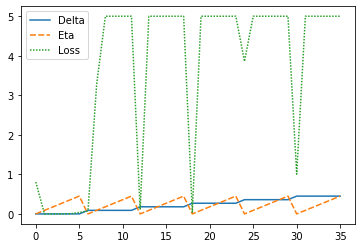

In [50]:

# Exercise 1: Change the hyperparameters (eta and delta) with values in the range of 0.001 - 0.5 inclusive.
# Create a table to compare the effect of the different hyperparameters on the results
# What are the best hyperparameters' values?




# weight = weight - eta * d(loss)/d(weight)
# Use the following code for the lab exercises, you will only need to modify some of its functions and paramters

# Initial weights 
w1 = np.random.random((2,4))
w2 = np.random.random((1,4))
w2 = w2.T  #to get the right shape for multiply

# Intialize the data we are training on 
x = np.array([[2,3]])
y = 5


def relu(X):
   return np.maximum(0,X)

def forward(x,y, weight1, weight2):
    out1 = relu(np.dot(x,weight1))
    out2 = relu(np.dot(out1, weight2))
    return loss(out2[0][0],y)


def loss(x,y):
    return abs(x-y)



def predict(x,weight1, weight2):
    out1 = relu(np.dot(x,weight1))
    out2 = relu(np.dot(out1, weight2))
    return out2[0][0]

# arbitrary change in weight
d_weight = 0.1

def calc_d(w,i,j, x, y, w1,w2,loss, incDelta):
  w[i,j] = w[i,j]+incDelta
  new_loss = forward(x,y,w1,w2)
  d_loss = new_loss-loss
  return d_loss/d_weight

def update_weights(w1, w2,x, y,loss, incDelta, incEta):   
    w1_updated = np.random.random((2,4))
    for i in range(2):
      for j in range(4):
        w1_updated[i,j] = w1[i,j] - incEta*calc_d(w1,i,j,x,y,w1,w2,loss, incDelta)

    w2_updated = np.random.random((1,4))
    w2_updated = w2_updated.T

    for i in range(4):
        w2_updated[i,0] = w2[i,0] - incEta*calc_d(w2, i,0,x,y,w1,w2,loss, incDelta)
     
    return w1_updated, w2_updated

#curr_loss = 5;
w1_min = 5;
w2_min = 5;

def train_nn(w1,w2,epochs, incDelta, incEta):
 minimum = 10000
 los = np.random.random(epochs)
 for z in range(100): 
   curr_loss = forward(x,y,w1, w2)
   los[z] = curr_loss
 
  # save the matrices with the minimum loss
   if (curr_loss<minimum):
    minimum = curr_loss
    w1_min = np.copy(w1)
    w2_min = np.copy(w2)
    
   w1,w2 = update_weights(w1, w2,x, y, curr_loss, incDelta, incEta)
 
 return los, w1_min, w2_min

# wu1 and wu2 have the matrices that gave minimum loss


lostVal = []


# d = []
# for p in game.players.passing():
#     d.append({'Player': p, 'Team': p.team, 'Passer Rating':
#         p.passer_rating()})

pd.DataFrame(d)

for i in np.arange(0.001, 0.5, 0.09):
    for j in np.arange(0.001, 0.5, 0.09):
       los, wu1, wu2 = train_nn(w1,w2,100, i, j)
       lostVal.append({'Delta': i, 'Eta': j, 'Loss': min(los)})
        
lossTable = pd.DataFrame(lostVal)



print(lossTable.sort_values(by = ['Loss']))


## Plot the error
print("min loss=",lossTable.min())
print("\n max loss=",lossTable.max())
print("\n mean loss=",lossTable.mean())
print("\n std loss=", lossTable.std())

sns.lineplot(data=df)

#The optimal values for the hyperparamters delta and eta are 0.001 and 0.361 with a los of 0.000090 respectively.



    Loss for MSEL  Loss for MSLL
0        0.032991       0.009175
1        0.144691       0.019218
2        0.250000       0.019218
3        0.250000       0.019218
4        0.250000       0.019218
..            ...            ...
95       0.250000       0.019218
96       0.250000       0.019218
97       0.250000       0.019218
98       0.250000       0.019218
99       0.250000       0.019218

[100 rows x 2 columns]
Min loss for MSEL =  0.03299113731047799
Min loss for MSLL =  0.00917474786234049
Max loss for MSEL =  0.25
Max loss for MSLL =  0.019218120556728054
Mean loss for MSEL =  0.24677682605846207
Mean loss for MSLL =  0.01911768682978418
STD loss for MSEL =  0.02402520735554582
STD loss for MSLL =  0.0010043372694387561


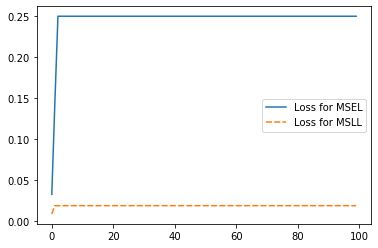

In [37]:
# Exercise 2: Regression loss functions are:
    # 1. Mean Squared Error Loss
    # 2. Mean Squared Logarithmic Error Loss
    # 3. Mean Absolute Error Loss
# Refer to: https://machinelearningmastery.com/how-to-choose-loss-functions-when-training-deep-learning-neural-networks/
# N =1

# Exercise 2a: Apply the mean squared error loss function
# Exercise 2b: Apply the mean squared Logarithmic error loss function

# Create a table to compare the effect of the different loss functions on the results

# Which is the best loss function to use for this case?

import math

# weight = weight - eta * d(loss)/d(weight)
# Use the following code for the lab exercises, you will only need to modify some of its functions and paramters

# Initial weights 


w1 = np.random.random((2,4))
w2 = np.random.random((1,4))
w2 = w2.T  #to get the right shape for multiply

# Intialize the data we are training on 
x = np.array([[2,3]])
y = 5



def meansqerrloss(obsrv, predic, epochs):
    summation = 0
    for i in range (0,epochs):  
        difference = obsrv - predic  
        squared_difference = difference**2  
        summation = summation + squared_difference  
        MSE = summation/epochs  
        return MSE
    
    
def meansqerlogloss(obsrv,predic, epochs):
    summation1 = 0
    for i in range(epochs): 
        difference = math.log(obsrv+1) - math.log(predic-1) 
        squared_difference = difference**2  
        summation1 = summation1 + squared_difference  
        MSLL = summation1/epochs
        return MSLL
    
def forward(x,y, weight1, weight2):
    out1 = relu(np.dot(x,weight1))
    out2 = relu(np.dot(out1, weight2))
    return loss(out2[0][0],y)

def forwardMSE(x,y, weight1, weight2, epochs):
    out1 = relu(np.dot(x,weight1))
    out2 = relu(np.dot(out1, weight2))
    return meansqerrloss(out2[0][0],y, epochs)


def forwardMSLL(x,y, weight1, weight2, epochs):
    out1 = relu(np.dot(x,weight1))
    out2 = relu(np.dot(out1, weight2))
    return meansqerlogloss(out2[0][0],y, epochs)


def relu(X):
    return np.maximum(0,X)




def loss(x,y):
    return abs(x-y)



def predict(x,weight1, weight2):
    out1 = relu(np.dot(x,weight1))
    out2 = relu(np.dot(out1, weight2))
    return out2[0][0]

# arbitrary change in weight
d_weight = 0.1

def calc_d(w,i,j, x, y, w1,w2,loss):
  w[i,j] = w[i,j]+d_weight
  new_loss = forward(x,y,w1,w2)
  d_loss = new_loss-loss
  return d_loss/d_weight

def update_weights(w1, w2,x, y,loss):   
    w1_updated = np.random.random((2,4))
    for i in range(2):
      for j in range(4):
        w1_updated[i,j] = w1[i,j] - 0.01*calc_d(w1,i,j,x,y,w1,w2,loss)

    w2_updated = np.random.random((1,4))
    w2_updated = w2_updated.T

    for i in range(4):
        w2_updated[i,0] = w2[i,0] - 0.01*calc_d(w2, i,0,x,y,w1,w2,loss)
     
    return w1_updated, w2_updated



# Exercise 2a: Apply the mean squared error loss function
# Exercise 2b: Apply the mean squared Logarithmic error loss function

# def train_nn(w1,w2,epochs):
#  minimum = 10000
#  los = np.random.random(epochs)
#  for z in range(100): 
#    curr_loss = forward(x,y,w1, w2)
#    los[z] = curr_loss
 
#   # save the matrices with the minimum loss
#    if (curr_loss<minimum):
#     minimum = curr_loss
#     w1_min = np.copy(w1)
#     w2_min = np.copy(w2)
    
#    w1,w2 = update_weights(w1, w2,x, y, curr_loss)
 
#  return los, w1_min, w2_min

# wu1 and wu2 have the matrices that gave minimum loss

def train_nn_msel(w1,w2,epochs):
 minimum = 10000
 losmsel = np.random.random(epochs)
 for z in range(100): 
   curr_loss = forwardMSE(x,y,w1, w2, epochs)
   losmsel[z] = curr_loss
 
  # save the matrices with the minimum loss
   if (curr_loss<minimum):
    minimum = curr_loss
    w1_min = np.copy(w1)
    w2_min = np.copy(w2)
    
   w1,w2 = update_weights(w1, w2,x, y, curr_loss)
 
 return losmsel, w1_min, w2_min


def train_nn_msll(w1,w2,epochs):
 minimum = 10000
 losmsll = np.random.random(epochs)
 for z in range(100): 
   curr_loss = forwardMSLL(x,y,w1, w2, epochs)
   losmsll[z] = curr_loss
 
  # save the matrices with the minimum loss
   if (curr_loss<minimum):
    minimum = curr_loss
    w1_min = np.copy(w1)
    w2_min = np.copy(w2)
    
   w1,w2 = update_weights(w1, w2,x, y, curr_loss)
 
 return losmsll, w1_min, w2_min

losmsel, wu1, wu2 = train_nn_msel(w1,w2,100)
mseldf = pd.DataFrame(losmsel)

losmsll, wu1, wu2 = train_nn_msll(w1,w2,100)
mslldf = pd.DataFrame(losmsll)


lossDF = pd.DataFrame({"Loss for MSEL": losmsel,"Loss for MSLL": losmsll})



print(lossDF)

print("Min loss for MSEL = ", lossDF["Loss for MSEL"].min())

print("Min loss for MSLL = ", lossDF["Loss for MSLL"].min())

print("Max loss for MSEL = ", lossDF["Loss for MSEL"].max())

print("Max loss for MSLL = ", lossDF["Loss for MSLL"].max())

print("Mean loss for MSEL = ", lossDF["Loss for MSEL"].mean())

print("Mean loss for MSLL = ", lossDF["Loss for MSLL"].mean())

print("STD loss for MSEL = ", lossDF["Loss for MSEL"].std())

print("STD loss for MSLL = ", lossDF["Loss for MSLL"].std())


sns.lineplot(data=lossDF)

#MSLL has far lesser loss than MSEL





min loss= ReLU          0.006626
Sigmoid       4.067065
Tanh          4.004120
Leaky ReLU    0.024888
dtype: float64
max loss= ReLU           3.701166
Sigmoid        4.935671
Tanh           5.999942
Leaky ReLU    12.159230
dtype: float64
mean loss= ReLU          1.433831
Sigmoid       4.837633
Tanh          5.398792
Leaky ReLU    1.637557
dtype: float64
std loss= ReLU          1.176047
Sigmoid       0.231261
Tanh          0.719453
Leaky ReLU    1.637551
dtype: float64
w1
[[0.86569204 1.5419764  0.50763208 0.52977121]
 [1.35094062 1.15832607 1.03717523 0.98192804]]
w2
[[ 0.50476696]
 [ 0.49068207]
 [ 0.01238552]
 [-0.30310286]]
predicted value:ReLU 4.975112422792813
predicted value:Sigmoid 0.6698962769518181
predicted value:Tanh 0.6074781697321846
predicted value:Leaky ReLU 4.975112422792813


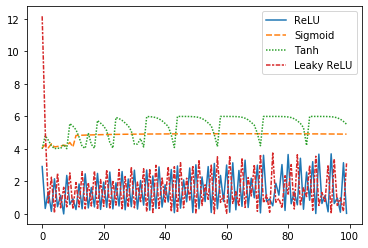

In [83]:

# Exercise 3: Try the following activation functions:
    # - RelU
    # - Sigmoid
    # - tanh
    # - Leaky RelU
# Refer to: https://ml-cheatsheet.readthedocs.io/en/latest/activation_functions.html

# Create a table that compares the effect of the different activation functions on the results

# Which is the best activation function to use for this case?



# weight = weight - eta * d(loss)/d(weight)
# Use the following code for the lab exercises, you will only need to modify some of its functions and paramters

# Initial weights 
w1 = np.random.random((2,4))
w2 = np.random.random((1,4))
w2 = w2.T  #to get the right shape for multiply

# Intialize the data we are training on 
x = np.array([[2,3]])
y = 5


###############ReLU##################

def relu(X):
    return np.maximum(0,X)

def forwardReLU(x,y, weight1, weight2):
    out1 = relu(np.dot(x,weight1))
    out2 = relu(np.dot(out1, weight2))
    return loss(out2[0][0],y)


def predictReLU(x,weight1, weight2):
    out1 = relu(np.dot(x,weight1))
    out2 = relu(np.dot(out1, weight2))
    return out2[0][0]


###############Sigmoid##################

def sigmoid(z):
    return 1.0 / (1 + np.exp(-z))


def forwardSigmoid(x,y, weight1, weight2):
    out1 = sigmoid(np.dot(x,weight1))
    out2 = sigmoid(np.dot(out1, weight2))
    return loss(out2[0][0],y)


def predictSigmoid(x,weight1, weight2):
    out1 = sigmoid(np.dot(x,weight1))
    out2 = sigmoid(np.dot(out1, weight2))
    return out2[0][0]



################tanh#####################

def tanh(z):

    return (np.exp(z) - np.exp(-z)) / (np.exp(z) + np.exp(-z))

def forwardTanh(x,y, weight1, weight2):
    out1 = tanh(np.dot(x,weight1))
    out2 = tanh(np.dot(out1, weight2))
    return loss(out2[0][0],y)


def predictTanh(x,weight1, weight2):
    out1 = tanh(np.dot(x,weight1))
    out2 = tanh(np.dot(out1, weight2))
    return out2[0][0]


###################Leaky ReLU##############


#Z in this case is the dot product of x and weight 1 or x out1 and weight 2. The dot product is a 
def leakyrelu(z, alpha):
    
    
    output = np.where(z > 0, z, z * alpha)
    return output


def forwardLeakyRelu(x,y, weight1, weight2, alpha):
    out1 = leakyrelu(np.dot(x,weight1), alpha)
    out2 = leakyrelu(np.dot(out1, weight2), alpha)
    return loss(out2[0][0],y)


def predictLeakyReLU(x,weight1, weight2, alpha):
    out1 = leakyrelu(np.dot(x,weight1), alpha)
    out2 = leakyrelu(np.dot(out1, weight2), alpha)
    return out2[0][0]




#################################

def loss(x,y):
    return abs(x-y)





# arbitrary change in weight
d_weight = 0.1

def calc_d(w,i,j, x, y, w1,w2,loss):
  w[i,j] = w[i,j]+d_weight
  new_loss = forward(x,y,w1,w2)
  d_loss = new_loss-loss
  return d_loss/d_weight

def update_weights(w1, w2,x, y,loss):   
    w1_updated = np.random.random((2,4))
    for i in range(2):
      for j in range(4):
        w1_updated[i,j] = w1[i,j] - 0.01*calc_d(w1,i,j,x,y,w1,w2,loss)

    w2_updated = np.random.random((1,4))
    w2_updated = w2_updated.T

    for i in range(4):
        w2_updated[i,0] = w2[i,0] - 0.01*calc_d(w2, i,0,x,y,w1,w2,loss)
     
    return w1_updated, w2_updated


def train_nn_relu(w1,w2,epochs):
 minimum = 10000
 los_relu = np.random.random(epochs)
 for z in range(100): 
   curr_loss = forwardReLU(x,y,w1, w2)
   los_relu[z] = curr_loss
 
  # save the matrices with the minimum loss
   if (curr_loss<minimum):
    minimum = curr_loss
    w1_min = np.copy(w1)
    w2_min = np.copy(w2)
    
   w1,w2 = update_weights(w1, w2,x, y, curr_loss)
 
 return los_relu, w1_min, w2_min


def train_nn_sigmoid(w1,w2,epochs):
 minimum = 10000
 los_sigmoid = np.random.random(epochs)
 for z in range(100): 
   curr_loss = forwardSigmoid(x,y,w1, w2)
   los_sigmoid[z] = curr_loss
 
  # save the matrices with the minimum loss
   if (curr_loss<minimum):
    minimum = curr_loss
    w1_min = np.copy(w1)
    w2_min = np.copy(w2)
    
   w1,w2 = update_weights(w1, w2,x, y, curr_loss)
 
 return los_sigmoid, w1_min, w2_min


def train_nn_tanh(w1,w2,epochs):
 minimum = 10000
 los_tanh = np.random.random(epochs)
 for z in range(100): 
   curr_loss = forwardTanh(x,y,w1, w2)
   los_tanh[z] = curr_loss
 
  # save the matrices with the minimum loss
   if (curr_loss<minimum):
    minimum = curr_loss
    w1_min = np.copy(w1)
    w2_min = np.copy(w2)
    
   w1,w2 = update_weights(w1, w2,x, y, curr_loss)
 
 return los_tanh, w1_min, w2_min



def train_nn_leakyrelu(w1,w2,epochs, alpha):
 minimum = 10000
 los_leakyrelu = np.random.random(epochs)
 for z in range(100): 
   curr_loss = forwardLeakyRelu(x,y,w1, w2, alpha)
   los_leakyrelu[z] = curr_loss
 
  # save the matrices with the minimum loss
   if (curr_loss<minimum):
    minimum = curr_loss
    w1_min = np.copy(w1)
    w2_min = np.copy(w2)
    
   w1,w2 = update_weights(w1, w2,x, y, curr_loss)
 
 return los_leakyrelu, w1_min, w2_min

# wu1 and wu2 have the matrices that gave minimum loss
los_relu, wu1, wu2 = train_nn_relu(w1,w2,100)
los_sigmoid, wu1, wu2 = train_nn_sigmoid(w1,w2,100)
los_tanh, wu1, wu2 = train_nn_tanh(w1,w2,100)
los_leakyrelu, wu1, wu2 = train_nn_leakyrelu(w1,w2,100, 0.01)


df = pd.DataFrame({"ReLU": los_relu, "Sigmoid": los_sigmoid, "Tanh": los_tanh, "Leaky ReLU": los_leakyrelu})


## Plot the error
print("min loss=",df.min())
print("max loss=",df.max())
print("mean loss=",df.mean())
print("std loss=", df.std())

sns.lineplot(data=df)

print("w1")
print(wu1)
print("w2")
print(wu2)
print("predicted value:ReLU",predictReLU(np.array([[2,3]]),wu1, wu2))
print("predicted value:Sigmoid",predictSigmoid(np.array([[2,3]]),wu1, wu2))
print("predicted value:Tanh",predictTanh(np.array([[2,3]]),wu1, wu2))
print("predicted value:Leaky ReLU",predictLeakyReLU(np.array([[2,3]]),wu1, wu2, 0.01))


#The best activation function to use is ReLU. 

#Sigmoid and Tanh perform very porrly.




100 epoch min loss= 0    0.010311
dtype: float64
100 epoch max loss= 0    5.0
dtype: float64
100 epoch mean loss= 0    1.691789
dtype: float64
100 epoch std loss= 0    1.406394
dtype: float64
1000 epoch min loss= 0    0.000121
dtype: float64
1000 epoch max loss= 0    5.0
dtype: float64
1000 epoch mean loss= 0    0.648082
dtype: float64
1000 epoch std loss= 0    0.702036
dtype: float64
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
w1
[[0.34905222 0.97653513 0.65985317 0.79836524]
 [0.15258954 0.79956365 0.43951573 0.59303696]]
w2
[[0.37057995]
 [0.22755098]
 [0.47747655]
 [0.68799042]]
predicted value: 5.000841604066661


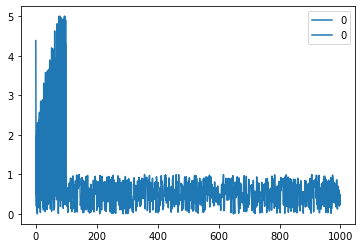

In [92]:
# Exercise 4: Change the number of epochs to 1000. 
# Comment on the effect this change had on the performance

# weight = weight - eta * d(loss)/d(weight)
# Use the following code for the lab exercises, you will only need to modify some of its functions and paramters

# Initial weights 
w1 = np.random.random((2,4))
w2 = np.random.random((1,4))
w2 = w2.T  #to get the right shape for multiply

# Intialize the data we are training on 
x = np.array([[2,3]])
y = 5


def relu(X):
   return np.maximum(0,X)

def forward(x,y, weight1, weight2):
    out1 = relu(np.dot(x,weight1))
    out2 = relu(np.dot(out1, weight2))
    return loss(out2[0][0],y)


def loss(x,y):
    return abs(x-y)



def predict(x,weight1, weight2):
    out1 = relu(np.dot(x,weight1))
    out2 = relu(np.dot(out1, weight2))
    return out2[0][0]

# arbitrary change in weight
d_weight = 0.1

def calc_d(w,i,j, x, y, w1,w2,loss):
  w[i,j] = w[i,j]+d_weight
  new_loss = forward(x,y,w1,w2)
  d_loss = new_loss-loss
  return d_loss/d_weight

def update_weights(w1, w2,x, y,loss):   
    w1_updated = np.random.random((2,4))
    for i in range(2):
      for j in range(4):
        w1_updated[i,j] = w1[i,j] - 0.01*calc_d(w1,i,j,x,y,w1,w2,loss)

    w2_updated = np.random.random((1,4))
    w2_updated = w2_updated.T

    for i in range(4):
        w2_updated[i,0] = w2[i,0] - 0.01*calc_d(w2, i,0,x,y,w1,w2,loss)
     
    return w1_updated, w2_updated


def train_nn(w1,w2,epochs):
 minimum = 10000
 los = np.random.random(epochs)
 for z in range(100): 
   curr_loss = forward(x,y,w1, w2)
   los[z] = curr_loss
 
  # save the matrices with the minimum loss
   if (curr_loss<minimum):
    minimum = curr_loss
    w1_min = np.copy(w1)
    w2_min = np.copy(w2)
    
   w1,w2 = update_weights(w1, w2,x, y, curr_loss)
 
 return los, w1_min, w2_min

# wu1 and wu2 have the matrices that gave minimum loss
los, wu1, wu2 = train_nn(w1,w2,100)

los2, wu1, wu2 = train_nn(w1,w2,1000)


df = pd.DataFrame(los)
df2 = pd.DataFrame(los2)


## Plot the error
print("100 epoch min loss=",df.min())
print("100 epoch max loss=",df.max())
print("100 epoch mean loss=",df.mean())
print("100 epoch std loss=", df.std())

print("1000 epoch min loss=",df2.min())
print("1000 epoch max loss=",df2.max())
print("1000 epoch mean loss=",df2.mean())
print("1000 epoch std loss=", df2.std())

print(sns.lineplot(data=df))
print(sns.lineplot(data=df2))

print("w1")
print(wu1)
print("w2")
print(wu2)
print("predicted value:",predict(np.array([[2,3]]),wu1, wu2))



#The minimum loss for 100 epochs is 0.0103 while the minimum loss for 1000 epochs is only 0.0001. This is magnitudes of orders of imprvements.